In [29]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools

## Task 2 using happniness

#### Load and scale

In [2]:
happiness = pd.read_csv('happiness.csv')
happiness = happiness.loc[:, happiness.columns != 'country']
minmax_scale = preprocessing.MinMaxScaler().fit(happiness)
happiness[[c for c in happiness.columns]] = minmax_scale.transform(happiness)
happiness.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.570025,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.565744,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.601575,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.668341,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.651068,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143


#### Create categorical feature as the target

In [3]:
happiness['Democratic Level'] = ['a' if d > 0.7 else 'c' if d < 0.45 else 'b' for d in happiness['Democratic Quality']]
democracy = happiness.copy()
democracy = democracy.loc[:, democracy.columns != 'Democratic Quality']
democracy

democracy.groupby('Democratic Level').count()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
Democratic Level,,,,,,,,,,,,,,,,,,,
a,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
b,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408,408
c,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381


#### Explore features

In [4]:
def explore_features(df, feature):
    plt.figure(figsize=(6, 4))
    zipped = zip(['a', 'b', 'c'], ('blue', 'red', 'green'))

    for label, color in zipped:
        mean = np.mean(df[feature][df['Democratic Level'] == label]) # class sample mean
        stdev = np.std(df[feature][df['Democratic Level'] == label]) # class standard deviation
        df[feature][df['Democratic Level'] == label].hist(alpha=0.2, # opacity level
                 label='level {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
                 color=color,
                 bins=15)

    plt.title('Distribution of ' + feature)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('count', fontsize=14)
    plt.legend(loc='upper left')

    plt.show()

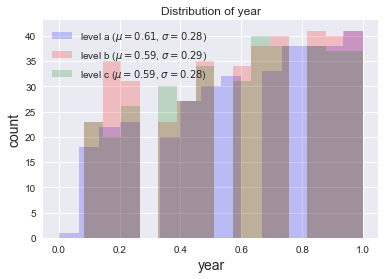

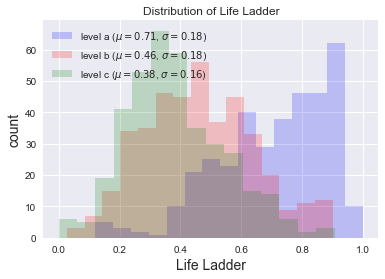

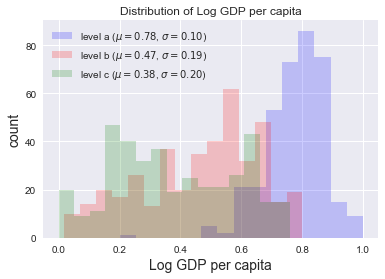

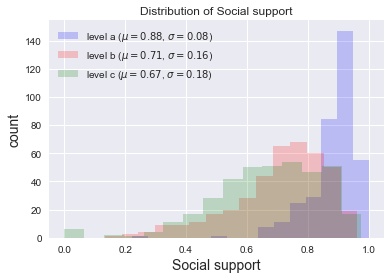

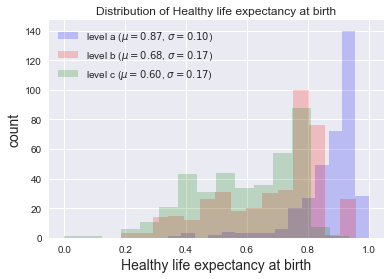

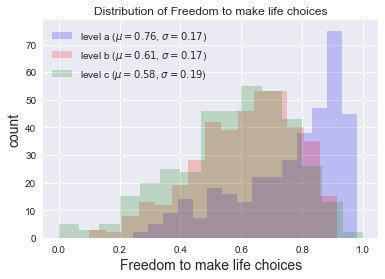

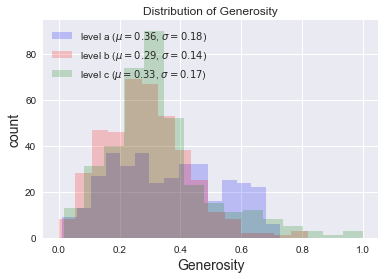

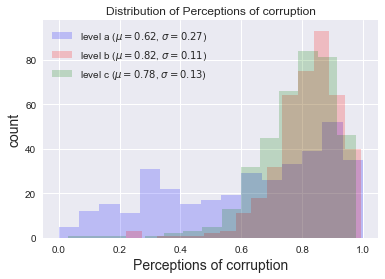

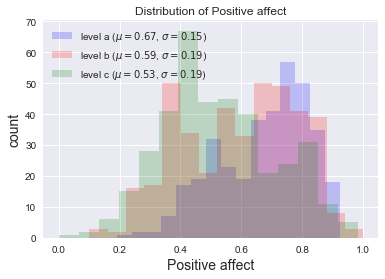

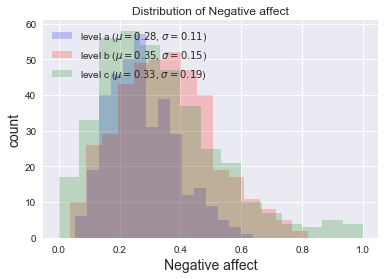

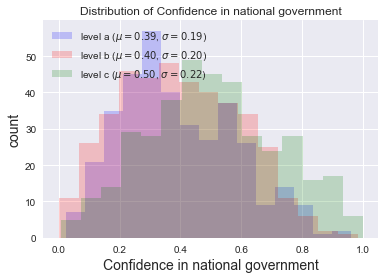

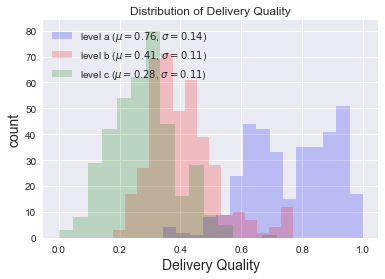

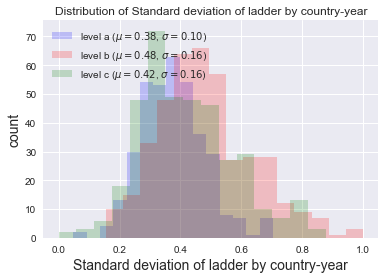

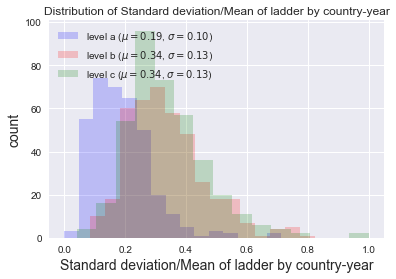

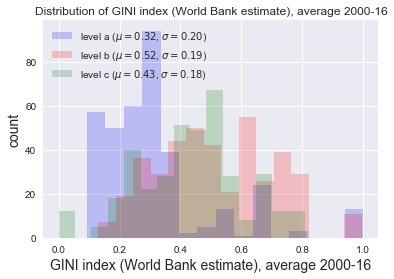

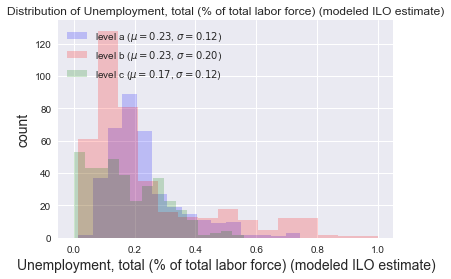

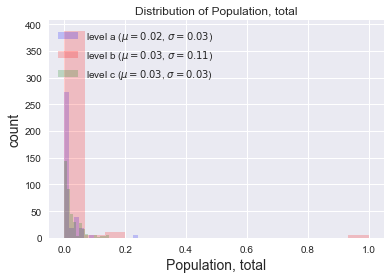

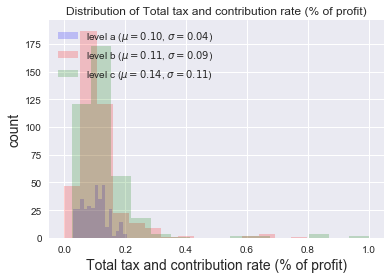

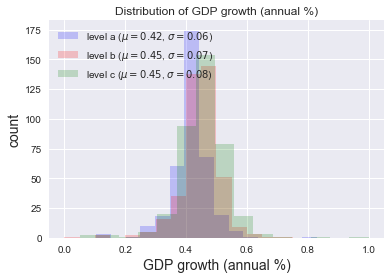

In [5]:
for c in [c for c in democracy.columns if c!='Democratic Level']:
    explore_features(democracy, c)

* As can be see above the 6 features are better for discriminating features: Life Ladder, Log GDP per capita, Social support,  Delivery Quality, GINI index (World Bank estimate), average 2000-16.

In [20]:
features = [
    'Life Ladder', 
    'Log GDP per capita', 
    'Social support',     
    'Delivery Quality', 
    'GINI index (World Bank estimate), average 2000-16'
]

In [22]:
list(itertools.combinations(features, 4))

[('Life Ladder', 'Log GDP per capita', 'Social support', 'Delivery Quality'),
 ('Life Ladder',
  'Log GDP per capita',
  'Social support',
  'GINI index (World Bank estimate), average 2000-16'),
 ('Life Ladder',
  'Log GDP per capita',
  'Delivery Quality',
  'GINI index (World Bank estimate), average 2000-16'),
 ('Life Ladder',
  'Social support',
  'Delivery Quality',
  'GINI index (World Bank estimate), average 2000-16'),
 ('Log GDP per capita',
  'Social support',
  'Delivery Quality',
  'GINI index (World Bank estimate), average 2000-16')]

#### Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(democracy[features], democracy['Democratic Level'], random_state=1, test_size=0.2)

In [30]:
nb = GaussianNB()
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [104]:
print("Test accuracy for NB (with feature selection):", nb.fit(x_train, y_train).score(x_test, y_test) )
print("Test accuracy for Tree (with feature selection):", treeclf.fit(x_train, y_train).score(x_test, y_test) )
print("Test accuracy for knn (with feature selection):", knn.fit(x_train, y_train).score(x_test, y_test) )

Test accuracy for NB (with feature selection): 0.7434782608695653
Test accuracy for Tree (with feature selection): 0.7652173913043478
Test accuracy for knn (with feature selection): 0.8695652173913043


In [39]:
# trees with different max depth
trees = [DecisionTreeClassifier(max_depth=d, random_state=1) for d in range(1, 18)]
[tree.fit(x_train, y_train).score(x_test, y_test) for tree in trees]

[0.64347826086956517,
 0.75217391304347825,
 0.76521739130434785,
 0.82173913043478264,
 0.81739130434782614,
 0.84782608695652173,
 0.85652173913043483,
 0.85217391304347823,
 0.86521739130434783,
 0.84347826086956523,
 0.85652173913043483,
 0.86086956521739133,
 0.86956521739130432,
 0.86521739130434783,
 0.86521739130434783,
 0.86521739130434783,
 0.86521739130434783]

In [42]:
#knns
knns = [KNeighborsClassifier(n_neighbors=n, metric='euclidean') for n in range(1, 22)]
[knn.fit(x_train, y_train).score(x_test, y_test) for knn in knns]

[0.91304347826086951,
 0.87826086956521743,
 0.88695652173913042,
 0.85217391304347823,
 0.86086956521739133,
 0.86086956521739133,
 0.85652173913043483,
 0.83478260869565213,
 0.82608695652173914,
 0.84347826086956523,
 0.82173913043478264,
 0.80869565217391304,
 0.81739130434782614,
 0.80434782608695654,
 0.82173913043478264,
 0.81739130434782614,
 0.81739130434782614,
 0.80869565217391304,
 0.82173913043478264,
 0.81739130434782614,
 0.81304347826086953]

## Task 3

In [12]:
happiness = pd.read_csv('happiness.csv')
happiness = happiness.loc[:, happiness.columns != 'country']
happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,2007,4.634252,9.077331,0.821372,65.800003,0.528605,-0.014393,0.874700,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.303250,15.966000,2970017.0,46.3,5.980000
1,2012,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.303250,13.376000,2900401.0,38.8,1.420000
2,2013,4.550648,9.258445,0.759477,67.239998,0.631830,-0.130645,0.862905,0.633609,0.338379,0.338095,0.070411,-0.330956,2.315580,0.508846,0.303250,15.866000,2895092.0,31.7,1.000000
3,2014,4.813763,9.278104,0.625587,67.519997,0.734648,-0.028162,0.882704,0.684911,0.334543,0.498786,0.314873,-0.187407,2.660069,0.552597,0.303250,17.490000,2889104.0,31.6,1.770000
4,2015,4.606651,9.302960,0.639356,67.800003,0.703851,-0.084411,0.884793,0.688370,0.350427,0.506978,0.251629,-0.152544,2.729001,0.592405,0.303250,17.080000,2880703.0,36.9,2.220000
5,2016,4.511101,9.337532,0.638411,68.099998,0.729819,-0.020687,0.901071,0.675244,0.321706,0.400910,0.257292,-0.134950,2.646668,0.586701,0.303250,15.220000,2876101.0,36.9,3.350000
6,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945,-0.130315,2.682105,0.578096,0.303250,13.750000,2873457.0,37.3,3.835544
7,2011,5.589001,8.684613,0.723094,52.500000,0.583702,0.065088,0.911320,0.658647,0.361063,0.232387,-0.747358,-1.215250,2.212474,0.395862,0.473500,7.362000,24218565.0,52.3,3.471981
8,2012,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.557908,0.304890,0.237091,-0.732785,-1.124386,2.150746,0.493262,0.473500,7.359000,25096150.0,52.3,8.542147
9,2013,3.937107,8.730368,0.721591,53.900002,0.409555,-0.092934,0.816375,0.658284,0.370875,0.547732,-0.752538,-1.213750,2.325728,0.590720,0.473500,7.454000,25998340.0,52.6,4.954590


In [28]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [85]:
minmax_scale = preprocessing.MinMaxScaler().fit(happiness)
happiness[[c for c in happiness.columns]] = minmax_scale.transform(happiness)
happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.570025,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.565744,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.601575,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.668341,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.651068,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143
5,0.916667,0.344467,0.575652,0.501223,0.840376,0.647834,0.301716,0.903384,0.538175,0.440084,0.352117,0.652615,0.440737,0.669335,0.509408,0.222289,0.431025,0.001911,0.088936,0.434652
6,1.000000,0.368804,0.583369,0.500196,0.847418,0.675129,0.289579,0.874077,0.527846,0.464645,0.414236,0.664264,0.441855,0.682633,0.499727,0.222289,0.388600,0.001909,0.090142,0.443464
7,0.500000,0.548699,0.445162,0.623111,0.474178,0.446323,0.388796,0.915430,0.509615,0.519459,0.167902,0.378230,0.180282,0.506397,0.294707,0.632530,0.204242,0.017852,0.135363,0.436866
8,0.583333,0.315885,0.448137,0.665570,0.490610,0.270248,0.196766,0.909531,0.336263,0.406171,0.173044,0.382210,0.202189,0.483233,0.404286,0.632530,0.204156,0.018507,0.135363,0.528885
9,0.666667,0.235712,0.454306,0.620947,0.507042,0.206156,0.228370,0.803842,0.508991,0.539247,0.512611,0.376815,0.180644,0.548897,0.513930,0.632530,0.206898,0.019181,0.136268,0.463774


Text(0.5, 1.0, 'Within Cluster Sum of Squares versus number of Clusters')

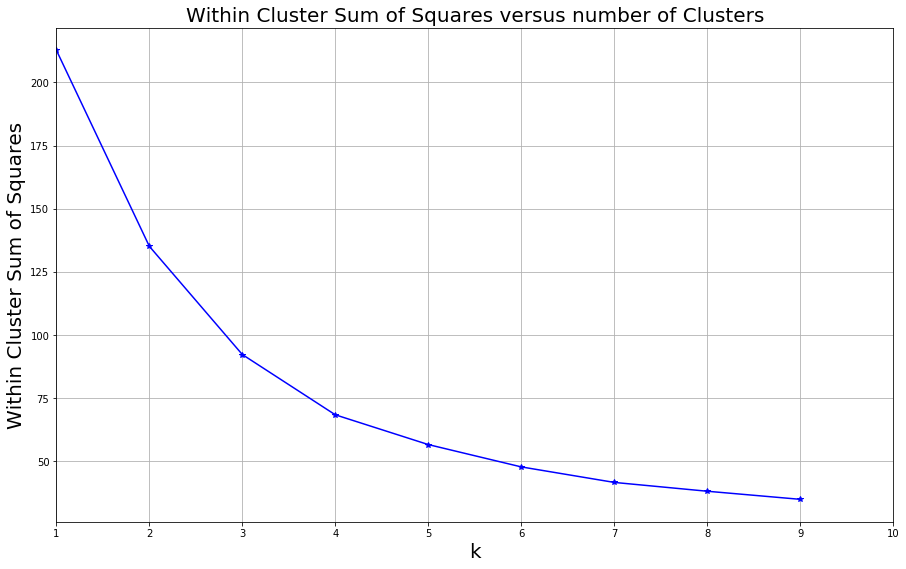

In [84]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(happiness[['year','Life Ladder', 'Log GDP per capita']].values) for k in k_rng]

# Generally want to minimize WSS, while also minimizing k
within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)
# Plot the results
plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

In [119]:
cs = [[x,y] for x in happiness.columns for y in happiness.columns if x!=y]
scores = []
for c in cs:
    km = KMeans(n_clusters=3, init='random')
    km.fit(happiness[c].values)
    prediction = km.predict(happiness[c].values)
    score = metrics.silhouette_score(happiness[c], prediction)
    scores.append((c, score))   

[(['year', 'Life Ladder'], 0.39127106134477135),
 (['year', 'Log GDP per capita'], 0.40383288181920257),
 (['year', 'Social support'], 0.4215482247152966),
 (['year', 'Healthy life expectancy at birth'], 0.4364162217170645),
 (['year', 'Freedom to make life choices'], 0.40861273308082247),
 (['year', 'Generosity'], 0.36530142804693805),
 (['year', 'Perceptions of corruption'], 0.48803339502624193),
 (['year', 'Positive affect'], 0.3849967059362458),
 (['year', 'Negative affect'], 0.37985206530452326),
 (['year', 'Confidence in national government'], 0.38143899713611673),
 (['year', 'Democratic Quality'], 0.3932052797656199),
 (['year', 'Delivery Quality'], 0.43367672951283975),
 (['year', 'Standard deviation of ladder by country-year'],
  0.40024385865950773),
 (['year', 'Standard deviation/Mean of ladder by country-year'],
  0.4055989854547329),
 (['year', 'GINI index (World Bank estimate), average 2000-16'],
  0.381161490263579),
 (['year',
   'Unemployment, total (% of total labor f

In [120]:
scores = sorted(scores, key=lambda s: s[1], reverse=True)    
scores

[(['Population, total', 'Total tax and contribution rate (% of profit)'],
  0.8899514306009096),
 (['Total tax and contribution rate (% of profit)', 'Population, total'],
  0.8899514306009094),
 (['Total tax and contribution rate (% of profit)',
   'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
  0.62092658314592),
 (['Healthy life expectancy at birth',
   'Total tax and contribution rate (% of profit)'],
  0.60926601004048),
 (['Total tax and contribution rate (% of profit)',
   'Healthy life expectancy at birth'],
  0.60926601004048),
 (['Population, total', 'year'], 0.5793756138496742),
 (['year', 'Population, total'], 0.5683395691600005),
 (['Positive affect', 'Total tax and contribution rate (% of profit)'],
  0.5669454365993946),
 (['Delivery Quality',
   'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
  0.5566573577499215),
 (['Unemployment, total (% of total labor force) (modeled ILO estimate)',
   'Delivery Quality'],
  0.556657

In [136]:
km = KMeans(n_clusters=3, init='random')
km.fit(happiness[['Population, total', 'Total tax and contribution rate (% of profit)']].values)
predictions = km.predict(happiness[['Population, total', 'Total tax and contribution rate (% of profit)']].values)
metrics.silhouette_score(happiness[['Population, total', 'Total tax and contribution rate (% of profit)']], predictions)

0.8899514306009096

Text(0.5, 1.0, 'This is a title')

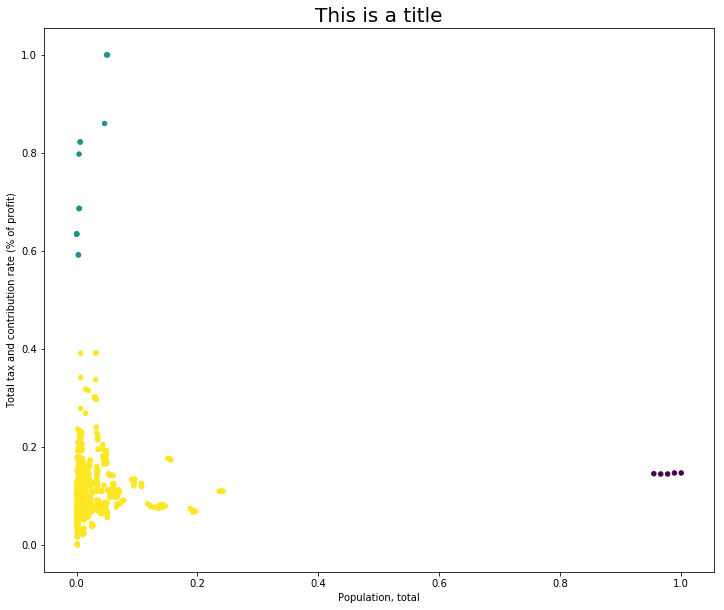

In [141]:
plt.figure(figsize=(12, 10))
plt.scatter(happiness.loc[:,'Population, total'], happiness.loc[:,'Total tax and contribution rate (% of profit)'], c = predictions, s=20)
plt.xlabel('Population, total')
plt.ylabel('Total tax and contribution rate (% of profit)')
plt.title('This is a title', fontsize = 20)

Text(0.5, 0.92, 'Include a title relevant to your plot')

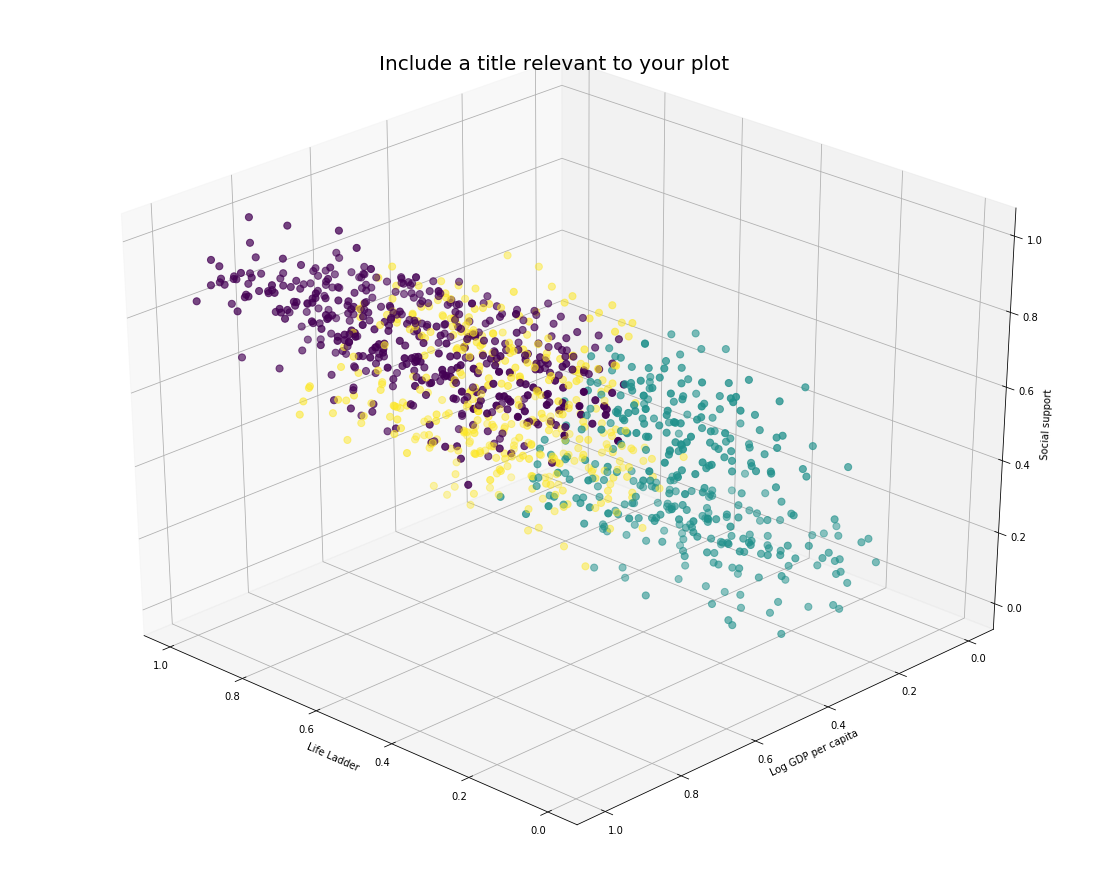

In [88]:
ax = Axes3D(plt.figure(figsize=(16, 12)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(happiness.loc[:,'year'], happiness.loc[:,'Life Ladder'], happiness.loc[:,'Log GDP per capita'], c=predictions, s=50)
ax.set_xlabel(happiness.columns[1])
ax.set_ylabel(happiness.columns[2])
ax.set_zlabel(happiness.columns[3])    
ax.set_title('Include a title relevant to your plot', fontsize = 20)